# <font size='10' color='#1ABC9C'> Explotratory Data Analysis </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
## When using the 'inline' backend, 
## your matplotlib graphs will be included in your notebook, next to the code.
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)



In [2]:
dataset=pd.read_csv('IncomeData.csv')

##What's the shape of data set
print(dataset.shape)

(4508, 13)


In [3]:
## What are the Top 5 records
dataset.head()

,age,yrsed,edcat,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
0,45,6,1,4,17,0.371518,1.294482,0,4,1,22,1,9.1
1,67,6,1,15,12,0.375552,0.392448,0,3,1,28,1,5.9
2,68,6,1,7,9,0.200970,0.789030,0,5,0,21,1,5.8
3,75,6,1,35,16,0.314096,0.757904,0,4,0,11,1,5.8
4,38,7,1,8,37,0.143190,0.411810,0,3,0,11,1,22.1


## Basic Summary of the Varables in the Data Set 

edcat   - Categorical Data

default - Categorical Data

jobsat  - Categorical Data

homeown - Categorical Data

cars    - Descrete and numerical Data

yrsed   - Descrete and numerical Data

yrsempl - Descrete and numerical Data

address - Descrete and numerical Data

age     - Descrete and numerical Data

creddebt- Continuous and Numeric Data

othdebt - Continuous and Numeric Data

carvalue- Continuous and Numeric Data

Income  - Continuous and Dependent Variable  

## Looking for Missing Values

In [4]:
## What percentage of Missing Values are there in the each feature

## Create a List of all features with missing values
features_miss_val=[features for features in dataset.columns if dataset[features].isnull().sum()>1] 
print(features_miss_val)

[]


The list is empty , hence we don't have missing values in the Data Set

## Numerical Variables

In [5]:
## List of all numerical variables
features_num = [features for features in dataset.columns if dataset[features].dtypes!='O']
print('Number of numerical features : ',len(features_num))
print("\n",features_num)


Number of numerical features :  13

 ['age', 'yrsed', 'edcat', 'yrsempl', 'income', 'creddebt', 'othdebt', 'default', 'jobsat', 'homeown', 'address', 'cars', 'carvalue']


### clearly the list contains categorical features too, 
### we need to handle them during the feature engineering

## <font color ='#E74C3C' >Categorical Features</font>

In [6]:
#List of features containing categorical data
catg_feature_list = [features for features in features_num if 'edcat' in features or 'default' in features or 'jobsat' in features or 'home' in features]

print (catg_feature_list)

['edcat', 'default', 'jobsat', 'homeown']


In [7]:
# what are the contents of categorical feature
for features in catg_feature_list:
    print(features,dataset[features].unique())

edcat [1 2 3 4 5]
default [0 1]
jobsat [4 3 5 1 2]
homeown [1 0]


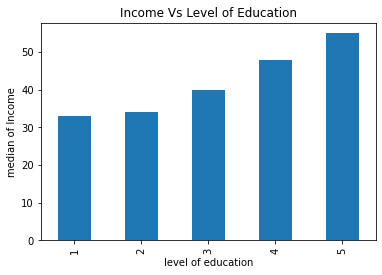

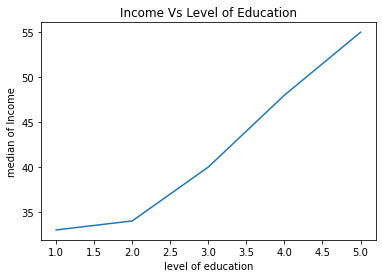

In [8]:
## Analyzing the relation between the category varables and Income

## Level of Education 
for i in range (0,2):
    if i==0:
            dataset.groupby('edcat')['income'].median().plot.bar()
            plt.xlabel('level of education')
            plt.ylabel('median of Income')
            plt.title('Income Vs Level of Education')
            plt.show()
    else : 
            dataset.groupby('edcat')['income'].median().plot()
            plt.xlabel('level of education')
            plt.ylabel('median of Income')
            plt.title('Income Vs Level of Education')
            plt.show()



## <font color ='#2ECC71' >Initial Outcome 1</font>
As the level of education increase , a person becomes more capable , which indeed helps in increasing the income.

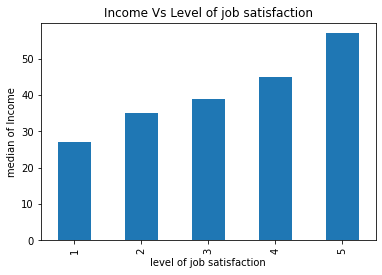

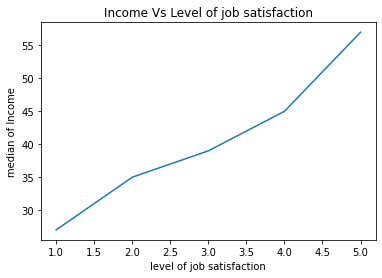

In [9]:
## Job Satisfaction and Income
for i in range (0,2):
    if i==0:
        dataset.groupby('jobsat')['income'].median().plot.bar()
        plt.xlabel('level of job satisfaction')
        plt.ylabel('median of Income')
        plt.title('Income Vs Level of job satisfaction')
        plt.show()
    else :
        dataset.groupby('jobsat')['income'].median().plot()
        plt.xlabel('level of job satisfaction')
        plt.ylabel('median of Income')
        plt.title('Income Vs Level of job satisfaction')
        plt.show()

## <font color ='#2ECC71' >Initial Outcome 2</font>
As the level of job satisfaction increase , the income also increases. 
Also we can say that the more a person is satisfied with the job, more better he'll perform thus leading to an increase in the income.

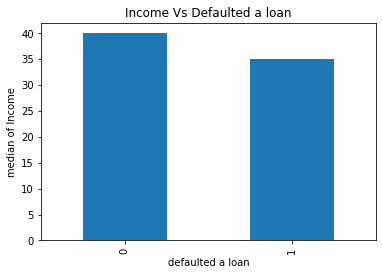

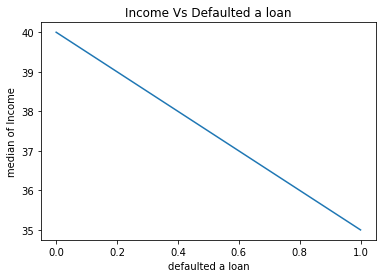

In [10]:
## Ever defaulted a Bank Loan and Income
for i in range (0,2):
    if i==0:
        dataset.groupby('default')['income'].median().plot.bar()
        plt.xlabel('defaulted a loan')
        plt.ylabel('median of Income')
        plt.title('Income Vs Defaulted a loan')
        plt.show()
    else:
        dataset.groupby('default')['income'].median().plot()
        plt.xlabel('defaulted a loan')
        plt.ylabel('median of Income')
        plt.title('Income Vs Defaulted a loan')
        plt.show()

## <font color ='#2ECC71' >Initial Outcome 3</font>
The defaulters usually have a lower income

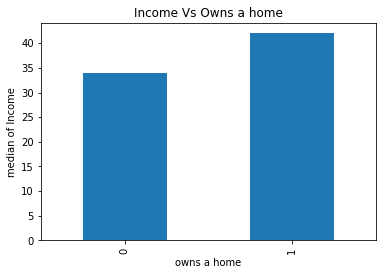

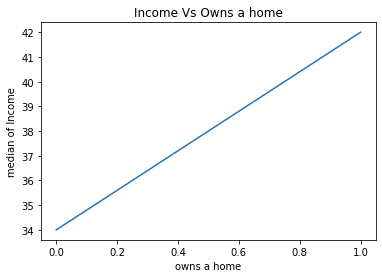

In [11]:
## Owns a home and Income
for i in range (0,2):
    if i==0:
        dataset.groupby('homeown')['income'].median().plot.bar()
        plt.xlabel('owns a home')
        plt.ylabel('median of Income')
        plt.title('Income Vs Owns a home')
        plt.show()
    else:
        dataset.groupby('homeown')['income'].median().plot()
        plt.xlabel('owns a home')
        plt.ylabel('median of Income')
        plt.title('Income Vs Owns a home')
        plt.show()

## <font color ='#2ECC71' >Initial Outcome 4</font>
The home owners usually have better income. 

## <font color ='#E74C3C' >Continuous Features</font>

For these feature we need to chek their distribution using the Histograms.

In [12]:
## List of Continuous Features 
Conti_Features = [features for features in features_num if 'income' in features or 'carvalue' in features or'debt' in features]
             

print(Conti_Features)

['income', 'creddebt', 'othdebt', 'carvalue']


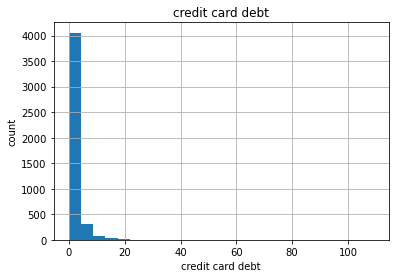

In [13]:
## credit cart debt
dataset['creddebt'].hist(bins=25)
plt.xlabel('credit card debt')
plt.ylabel('count')
plt.title('credit card debt')
plt.show()
   
    

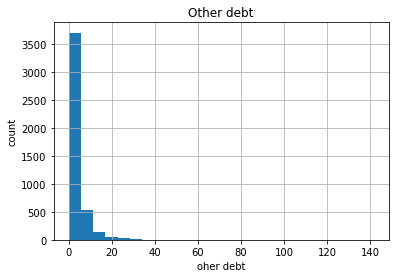

In [64]:
## other Debt
dataset['othdebt'].hist(bins=25)
plt.xlabel('oher debt')
plt.ylabel('count')
plt.title('Other debt')
plt.show()

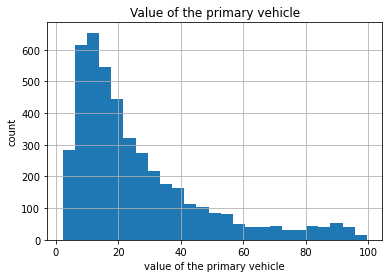

In [62]:
## carvalue
dataset['carvalue'].hist(bins=25)
plt.xlabel('value of the primary vehicle')
plt.ylabel('count')
plt.title('Value of the primary vehicle')
plt.show()

In [ ]:
## income
dataset['income'].hist(bins=25)
plt.xlabel('income of person')
plt.ylabel('count')
plt.title('income Distribution in Dataset')
plt.show()

## <font color ='#2ECC71' >Initial Outcome 5</font>
We need to convert above distributions of the continuous variables into Gaussian Distributuon
or Standard Normal Distribution before performing the Regresssion.

## <font color ='#E74C3C' >Descrete Features</font>


In [ ]:
# List of the Descrete features
Dec_Features = [features for features in features_num if features not in Conti_Features + catg_feature_list]

print(Dec_Features)

In [ ]:
for feature in Dec_Features:
    dataset.groupby(feature)['income'].median().plot.bar()
    plt.ylabel('income')
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()
    
    dataset.groupby(feature)['income'].median().plot()
    plt.ylabel('income')
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

## <font color ='#2ECC71' >Initial Outcome 6</font>
 Age Vs Income :- Middle Aged people have more income than the other ages 
 
 Years of Education Vs Income :- There is almost an exponential rise in income with increase in Years   of Education
 
 Years of Employment VS Income :- No significant observation , other than arount 45 years of Exp. has   more income
 
 Years of living at and address VS Income :- No significant observation , other than people living at   same address for 20-40 years have good income
 
 Number of Cars Vs Income :- There is almost an exponential rise in income with increase in number of   cars , it seems people with more number of cars tend to have more income
       

## <font size = 8  color='#F1C40F'>Transforming the Skewed Distributions - Exploratory Data Analysis</font>

## Using Logarithmic transformation

In [90]:
# take a copy of the dataset 
data_to_transform = dataset.copy()

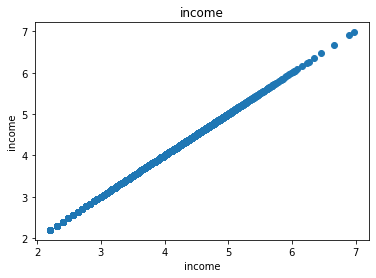

C:\Users\offic\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


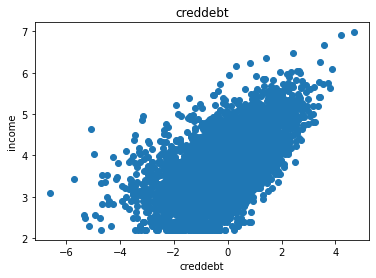

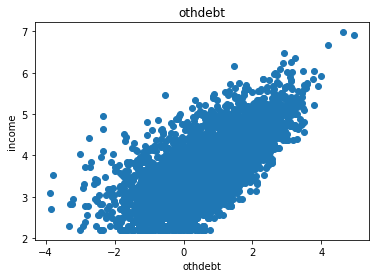

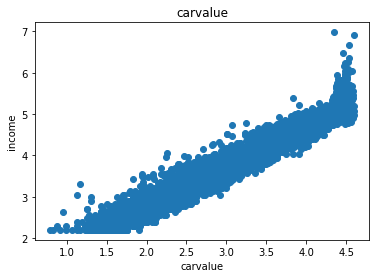

In [91]:
for feature in Conti_Features:
        data_to_transform[feature] = np.log(data_to_transform[feature])
        #data_to_transform['income']  = np.log(data_to_transform['income'])
        plt.scatter(data_to_transform[feature],data_to_transform['income'])
        plt.xlabel(feature)
        plt.ylabel('income')
        plt.title(feature)
        plt.show()

    

## <font color ='#2ECC71' >Initial Outcome 7</font>
 ALL the three continuous variables show positive trends with income
 
 Though there are some Outliers , we need to handle them


## <font size = 8  color='#F1C40F'>Looking At Outliers - Exploratory Data Analysis</font>

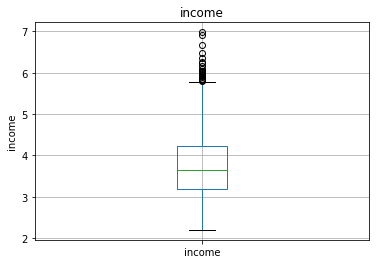

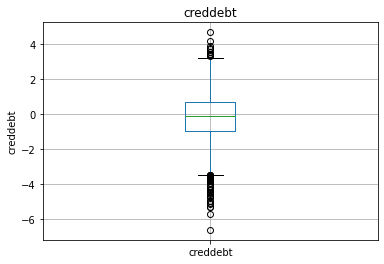

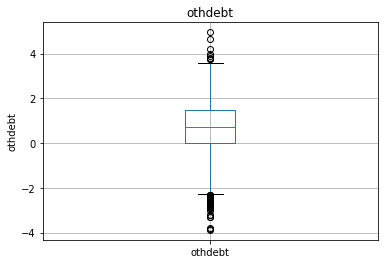

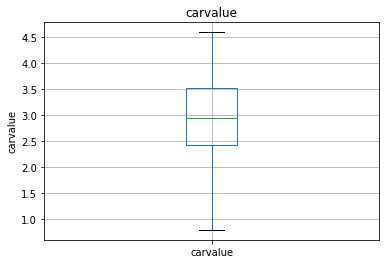

In [92]:
# for every feature finding the outliers
for feature in Conti_Features:
        data_to_transform.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        